In [1]:
from pymc3 import Model, Uniform, Normal, Binomial
from pymc3 import fit

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dados_experimento = pd.read_csv("machos.csv")
dados_experimento

,d_e_Immobility_s,f_e_Immobility_s,d_total_experimento,d_e_Swimming_s,f_e_Swimming_s,d_total_experimento.1,id_eto,id_j,sexo,dosagem,unidade
0,31.466667,41,297.500000,8.633333,17,297.500000,5ea2305793f4d55ef029829b,5ea2305793f4d55ef0298297,macho,flx2.5mg,A1
1,34.566667,44,247.800000,10.366667,19,247.800000,5ea2305793f4d55ef02982a4,5ea2305793f4d55ef02982a0,macho,flx2.5mg,A2
2,47.900000,54,247.800000,6.166667,22,247.800000,5ea2305793f4d55ef02982ad,5ea2305793f4d55ef02982a9,macho,flx2.5mg,A2
3,33.600000,38,244.400000,13.800000,15,244.400000,5ea2305893f4d55ef02982b6,5ea2305893f4d55ef02982b2,macho,flx2.5mg,A2
4,47.466667,53,246.433333,8.500000,24,246.433333,5ea2305893f4d55ef02982bf,5ea2305893f4d55ef02982bb,macho,flx2.5mg,A2
5,119.900000,61,246.666667,10.400000,34,246.666667,5ea2305893f4d55ef02982c8,5ea2305893f4d55ef02982c4,macho,flx2.5mg,A3
6,64.633333,45,245.700000,12.966667,29,245.700000,5ea2305993f4d55ef02982d1,5ea2305993f4d55ef02982cd,macho,flx2.5mg,A4
7,87.966667,105,247.500000,22.500000,57,247.500000,5ea2305993f4d55ef02982da,5ea2305993f4d55ef02982d6,macho,flx2.5mg,A5
8,79.466667,81,247.700000,23.533333,43,247.700000,5ea2305993f4d55ef02982e3,5ea2305993f4d55ef02982df,macho,flx2.5mg,A6
9,92.466667,81,247.233333,16.900000,40,247.233333,5ea2305a93f4d55ef02982ec,5ea2305a93f4d55ef02982e8,macho,flx2.5mg,A6


In [4]:
dados_veiculo = dados_experimento[dados_experimento["dosagem"] =="veiculo"]
dados_veiculo

,d_e_Immobility_s,f_e_Immobility_s,d_total_experimento,d_e_Swimming_s,f_e_Swimming_s,d_total_experimento.1,id_eto,id_j,sexo,dosagem,unidade
12,54.900000,61,269.033333,69.933333,53,269.033333,5ea2305d93f4d55ef029834f,5ea2305d93f4d55ef029834b,macho,veiculo,A1
13,128.533333,85,247.666667,22.166667,52,247.666667,5ea2305e93f4d55ef0298358,5ea2305e93f4d55ef0298354,macho,veiculo,A2
14,87.866667,58,247.333333,9.466667,21,247.333333,5ea2305e93f4d55ef0298361,5ea2305e93f4d55ef029835d,macho,veiculo,A3
15,58.066667,64,247.533333,26.933333,49,247.533333,5ea2305e93f4d55ef029836a,5ea2305e93f4d55ef0298366,macho,veiculo,A4
16,109.000000,80,245.633333,21.433333,46,245.633333,5ea2305f93f4d55ef0298373,5ea2305f93f4d55ef029836f,macho,veiculo,A5
17,75.400000,59,248.533333,53.933333,46,248.533333,5ea2305f93f4d55ef029837c,5ea2305f93f4d55ef0298378,macho,veiculo,A6


In [5]:
dados_flx = dados_experimento[dados_experimento["dosagem"] =="flx2.5mg"]
dados_flx

,d_e_Immobility_s,f_e_Immobility_s,d_total_experimento,d_e_Swimming_s,f_e_Swimming_s,d_total_experimento.1,id_eto,id_j,sexo,dosagem,unidade
0,31.466667,41,297.500000,8.633333,17,297.500000,5ea2305793f4d55ef029829b,5ea2305793f4d55ef0298297,macho,flx2.5mg,A1
1,34.566667,44,247.800000,10.366667,19,247.800000,5ea2305793f4d55ef02982a4,5ea2305793f4d55ef02982a0,macho,flx2.5mg,A2
2,47.900000,54,247.800000,6.166667,22,247.800000,5ea2305793f4d55ef02982ad,5ea2305793f4d55ef02982a9,macho,flx2.5mg,A2
3,33.600000,38,244.400000,13.800000,15,244.400000,5ea2305893f4d55ef02982b6,5ea2305893f4d55ef02982b2,macho,flx2.5mg,A2
4,47.466667,53,246.433333,8.500000,24,246.433333,5ea2305893f4d55ef02982bf,5ea2305893f4d55ef02982bb,macho,flx2.5mg,A2
5,119.900000,61,246.666667,10.400000,34,246.666667,5ea2305893f4d55ef02982c8,5ea2305893f4d55ef02982c4,macho,flx2.5mg,A3
6,64.633333,45,245.700000,12.966667,29,245.700000,5ea2305993f4d55ef02982d1,5ea2305993f4d55ef02982cd,macho,flx2.5mg,A4
7,87.966667,105,247.500000,22.500000,57,247.500000,5ea2305993f4d55ef02982da,5ea2305993f4d55ef02982d6,macho,flx2.5mg,A5
8,79.466667,81,247.700000,23.533333,43,247.700000,5ea2305993f4d55ef02982e3,5ea2305993f4d55ef02982df,macho,flx2.5mg,A6
9,92.466667,81,247.233333,16.900000,40,247.233333,5ea2305a93f4d55ef02982ec,5ea2305a93f4d55ef02982e8,macho,flx2.5mg,A6


In [6]:
# duracao_imobilidade = dados_veiculo["d_e_Immobility_s"]
n_veiculo = dados_veiculo["d_total_experimento"]
n_flx = dados_flx["d_total_experimento"]
with Model() as imobilidade_model_veiculo:
#     probabilidade do animal adotar a postura de imobilidade vai de 0% até 100
    p_imobilidade_veiculo = Uniform("p_imobilidade_veiculo", lower=0, upper=1)
    imobilidade_dado_p_veiculo = Binomial('imobilidade_dado_p_veiculo', p=p_imobilidade_veiculo, observed=dados_veiculo["d_e_Immobility_s"], n=n_veiculo)
    
    p_imobilidade_flx = Uniform("p_imobilidade_flx", lower=0, upper=1)
    imobilidade_dado_p_flx = Binomial('imobilidade_dado_p_flx', p=p_imobilidade_flx, observed=dados_flx["d_e_Immobility_s"], n=n_flx)
#     samples_flx =  fit(random_seed=10000).sample(100000)

In [7]:
# with imobilidade_model_veiculo:
#     diff_of_means = Deterministic('difference of means', p_imobilidade_flx - p_imobilidade_veiculo)   
#     effect_size = Deterministic('effect size',
#                                 diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))
    
    

In [8]:
tamanho_amostra = 1000000
with imobilidade_model_veiculo:
    samples =  fit(random_seed=10000).sample(tamanho_amostra)

Average Loss = 216.73: 100%|█████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3140.68it/s]
Finished [100%]: Average Loss = 216.68


In [9]:
from pymc3 import plot_posterior

C:\Users\zn_jo\AppData\Local\Programs\Python\Python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2AB489CC8>,
      dtype=object)

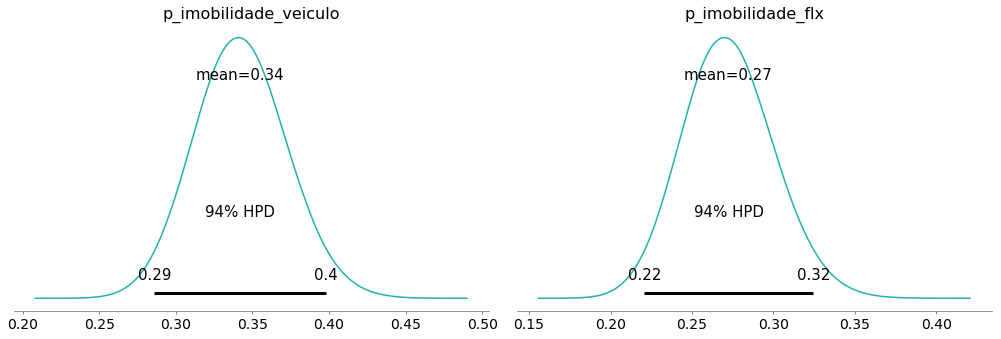

In [10]:
plot_posterior(samples, varnames=["p_imobilidade_veiculo", "p_imobilidade_flx"], color="LightSeaGreen")

In [11]:
np.mean(samples["p_imobilidade_veiculo"])

0.3417111534099481

In [12]:
def calculo_tamanho_efeito(veiculo, tratado):
    m_veiculo = np.mean(veiculo)
    m_tratado = np.mean(tratado)
    var_veiculo = np.var(veiculo)
    var_tratado = np.var(tratado)
    # cohen tamanho do efeito
    diff_of_means =  m_tratado - m_veiculo
    effect_size = diff_of_means / np.sqrt((var_veiculo + var_tratado) / 2)
    return effect_size

In [13]:
print(f'O tamanho do efeito, usando a formula de Cohen, foi de: {calculo_tamanho_efeito(samples["p_imobilidade_veiculo"], samples["p_imobilidade_flx"])} . Medido em des')

O tamanho do efeito, usando a formula de Cohen, foi de: -2.4250992213210156 . Medido em desvios


In [20]:
from matplotlib.pyplot import figure

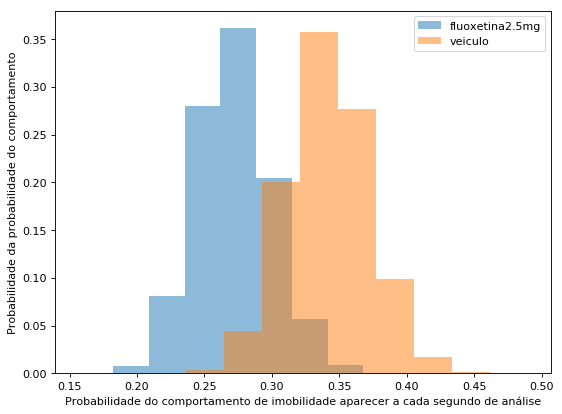

In [21]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist( samples["p_imobilidade_flx"], weights=np.full(tamanho_amostra , 1/tamanho_amostra), label="fluoxetina2.5mg", alpha=0.5)
plt.hist( samples["p_imobilidade_veiculo"], weights=np.full(tamanho_amostra , 1/tamanho_amostra), label="veiculo", alpha=0.5)
plt.ylabel("Probabilidade da probabilidade do comportamento")
plt.xlabel("Probabilidade do comportamento de imobilidade aparecer a cada segundo de análise")
plt.legend()
plt.show()

In [19]:
print(f'O tamanho do efeito, usando a formula de Cohen, foi de: {calculo_tamanho_efeito(samples["p_imobilidade_veiculo"], samples["p_imobilidade_flx"])} . Medido em desvio padrão')

O tamanho do efeito, usando a formula de Cohen, foi de: -2.4250992213210156 . Medido em desvio padrão
